# First Objective: Velocity Packet Tracker Visualisation

## Google Summer of Code 2024

Author: Sarthak Srivastava


In [1]:
# Imports
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import plotly.graph_objects as go
from plotly.subplots import make_subplots

from tardis import run_tardis
from tardis.io.atom_data.util import download_atom_data
from tardis.util.base import int_to_roman
from tardis.visualization import SDECPlotter

Iterations:          0/? [00:00<?, ?it/s]

Packets:             0/? [00:00<?, ?it/s]

### 1. Run simulation and generate SDEC Plot


In [2]:
# Download atom data
download_atom_data("kurucz_cd23_chianti_H_He")

Atomic Data kurucz_cd23_chianti_H_He already exists in /Users/archil/Downloads/tardis-data/kurucz_cd23_chianti_H_He.h5. Will not download - override with force_download=True.


In [3]:
sim = run_tardis(
    "tardis_example.yml",
    virtual_packet_logging=True,
    show_convergence_plots=True,
    export_convergence_plots=True,
    log_level="ERROR",
)

[py.warnings         ][WARNING]  
	/Users/archil/Documents/tardis/tardis/plasma/properties/radiative_properties.py:93: RuntimeWarning: invalid value encountered in divide
  (g_lower * n_upper) / (g_upper * n_lower)
 (warnings.py:109)


OMP: Info #276: omp_set_nested routine deprecated, please use omp_set_max_active_levels instead.


[py.warnings         ][WARNING]  
	/Users/archil/Documents/tardis/tardis/plasma/properties/radiative_properties.py:93: RuntimeWarning: invalid value encountered in divide
  (g_lower * n_upper) / (g_upper * n_lower)
 (warnings.py:109)


TqdmHBox(children=(HTML(value='Iterations:', layout=Layout(width='6%')), FloatProgress(value=0.0, layout=Layou…

TqdmHBox(children=(HTML(value='Packets:   ', layout=Layout(width='6%')), FloatProgress(value=0.0, layout=Layou…

[py.warnings         ][WARNING]  
	/Users/archil/Documents/tardis/tardis/plasma/properties/radiative_properties.py:93: RuntimeWarning: invalid value encountered in divide
  (g_lower * n_upper) / (g_upper * n_lower)
 (warnings.py:109)


    'data': [{'type': 'scatter', 'uid': 'f07a3554-f87f-40dd-88b3-30c9fbe4f477', …

[py.warnings         ][WARNING]  
	/Users/archil/Documents/tardis/tardis/plasma/properties/radiative_properties.py:93: RuntimeWarning:

invalid value encountered in divide

 (warnings.py:109)
[py.warnings         ][WARNING]  
	/Users/archil/Documents/tardis/tardis/plasma/properties/radiative_properties.py:93: RuntimeWarning:

invalid value encountered in divide

 (warnings.py:109)
[py.warnings         ][WARNING]  
	/Users/archil/Documents/tardis/tardis/plasma/properties/radiative_properties.py:93: RuntimeWarning:

invalid value encountered in divide

 (warnings.py:109)
[py.warnings         ][WARNING]  
	/Users/archil/Documents/tardis/tardis/plasma/properties/radiative_properties.py:93: RuntimeWarning:

invalid value encountered in divide

 (warnings.py:109)
[py.warnings         ][WARNING]  
	/Users/archil/Documents/tardis/tardis/plasma/properties/radiative_properties.py:93: RuntimeWarning:

invalid value encountered in divide

 (warnings.py:109)
[py.warnings         ][WARNING]  
	/User

<Axes: xlabel='Wavelength $[\\mathrm{\\AA}]$', ylabel='$L_{\\lambda}$ [erg $\\mathrm{s^{-1}}$ $\\mathrm{\\AA^{-1}}$]'>

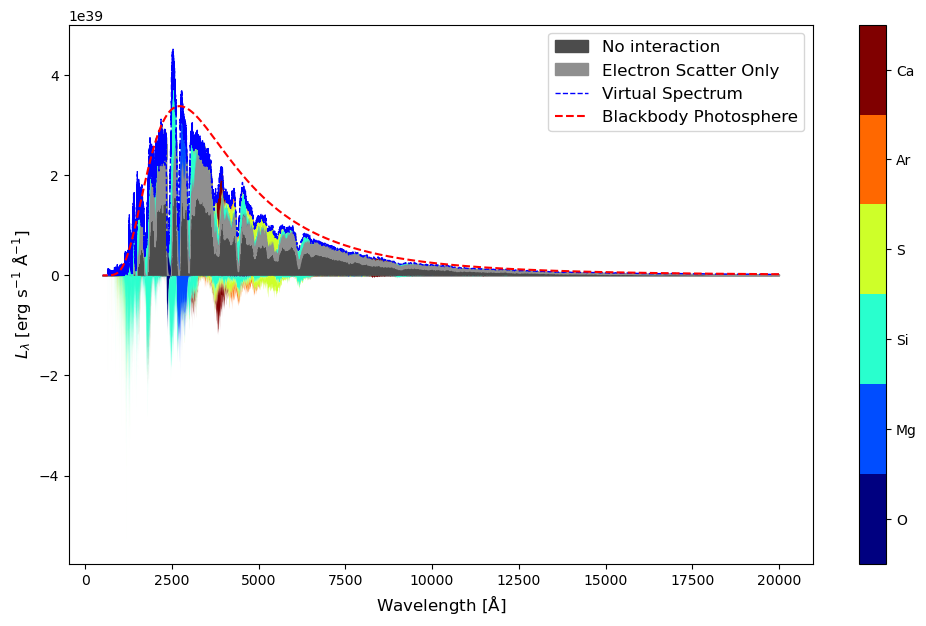

In [4]:
SDECPlotter.from_simulation(sim).generate_plot_mpl()

### 2. Abundance of Elements vs Shell Velocity


In [5]:
# Get x-axis values: shell velocities
shell_velocities = sim.simulation_state.v_inner.si
print(shell_velocities)

[11000000. 11450000. 11900000. 12350000. 12800000. 13250000. 13700000.
 14150000. 14600000. 15050000. 15500000. 15950000. 16400000. 16850000.
 17300000. 17750000. 18200000. 18650000. 19100000. 19550000.] m / s


In [6]:
# Get y-axis values: element abundances
abundances = sim.plasma.abundance
abundances

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
atomic_number,,,,,,,,,,,,,,,,,,,,
8,0.19,0.19,0.19,0.19,0.19,0.19,0.19,0.19,0.19,0.19,0.19,0.19,0.19,0.19,0.19,0.19,0.19,0.19,0.19,0.19
12,0.03,0.03,0.03,0.03,0.03,0.03,0.03,0.03,0.03,0.03,0.03,0.03,0.03,0.03,0.03,0.03,0.03,0.03,0.03,0.03
14,0.52,0.52,0.52,0.52,0.52,0.52,0.52,0.52,0.52,0.52,0.52,0.52,0.52,0.52,0.52,0.52,0.52,0.52,0.52,0.52
16,0.19,0.19,0.19,0.19,0.19,0.19,0.19,0.19,0.19,0.19,0.19,0.19,0.19,0.19,0.19,0.19,0.19,0.19,0.19,0.19
18,0.04,0.04,0.04,0.04,0.04,0.04,0.04,0.04,0.04,0.04,0.04,0.04,0.04,0.04,0.04,0.04,0.04,0.04,0.04,0.04
20,0.03,0.03,0.03,0.03,0.03,0.03,0.03,0.03,0.03,0.03,0.03,0.03,0.03,0.03,0.03,0.03,0.03,0.03,0.03,0.03


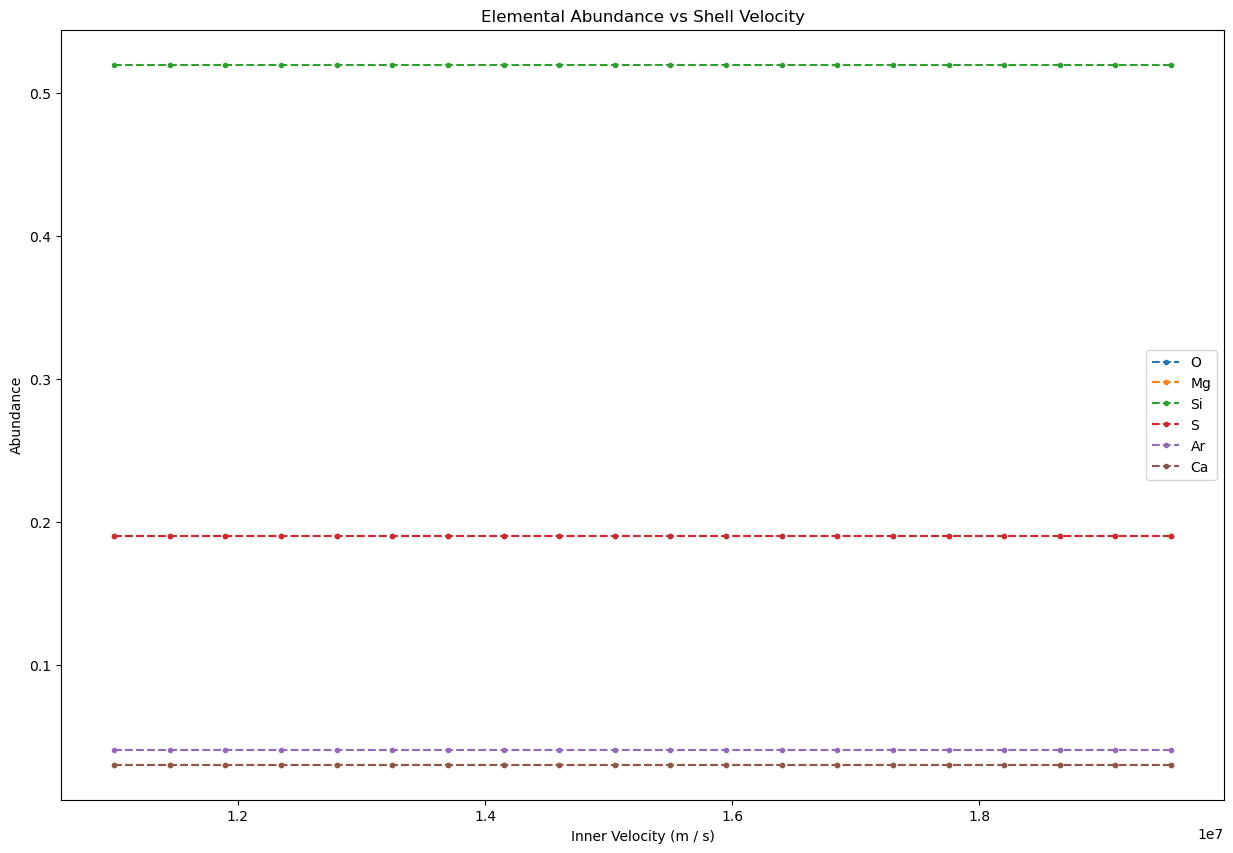

In [7]:
# Plot data in Matplotlib
fig, axis = plt.subplots(figsize=(15, 10))

ATOM_DATA = sim.plasma.atomic_data.atom_data

for atomic_number in sim.plasma.selected_atoms:
    axis.step(
        shell_velocities,
        abundances.loc[atomic_number],
        marker=".",
        linestyle="--",
        where="post",
        label=ATOM_DATA.symbol.loc[atomic_number],
    )

_ = axis.set(
    title="Elemental Abundance vs Shell Velocity",
    xlabel=f"Inner Velocity ({str(shell_velocities.unit)})",
    ylabel="Abundance",
)
_ = axis.legend()

In [8]:
# Plot data in Plotly

fig = go.Figure()

for atomic_number in sim.plasma.selected_atoms:
    fig.add_trace(
        go.Scatter(
            x=shell_velocities,
            y=abundances.loc[atomic_number],
            mode="lines+markers",
            name=ATOM_DATA.symbol.loc[atomic_number],
            line=dict(dash="dot"),
            line_shape="hv",
        )
    )

# Update layout for a common legend and titles
fig.update_layout(
    title="Elemental Abundance vs Shell Velocity",
    xaxis_title=f"Inner Velocity ({str(shell_velocities.unit)})",
    yaxis_title="Abundance",
    legend_title="Ion",
)

fig.show()

### 3. Number of interactions (escaped) for each element


In [9]:
LINE_REFERENCE = sim.plasma.atomic_data.lines  # To look up line data by ID

In [10]:
def interaction_count_by_ion(line_ids):
    """
    Looks up the line_ids in the line reference table and counts the interactions grouping by (atomic_number, ion_number)
    Returns a pd.Series with index containing ion name (Eg: "Si II") and corresponding interaction count.
    """
    # Filter out non-escaped packets
    line_ids = [line_id for line_id in line_ids if line_id != -1]

    # Group by ion
    num_lines_per_ion = (
        LINE_REFERENCE.iloc[line_ids]
        .groupby(level=["atomic_number", "ion_number"])
        .size()
    )

    # Create and return new Series
    combined_idx = num_lines_per_ion.index.map(
        lambda x: f"{ATOM_DATA.symbol.loc[x[0]]} {int_to_roman(x[1]+1)}"
    )
    combined_idx.name = "Ion"
    return pd.Series(
        num_lines_per_ion.values, index=combined_idx, name="interaction_count"
    )

In [11]:
# Get line interaction IDs and compute counts by ion
out_lines = sim.transport.transport_state.last_line_interaction_out_id
virt_out_lines = (
    sim.transport.transport_state.virt_packet_last_line_interaction_out_id
)

# Get count per ion
out_line_count_by_ion = interaction_count_by_ion(out_lines)
virt_out_line_count_by_ion = interaction_count_by_ion(virt_out_lines)

In [12]:
# Print the data before plotting
out_line_count_by_ion

Ion
O I          70
O II         92
O III       586
Mg II      2835
Si II      6055
Si III    10229
Si IV       137
S I           2
S II       4238
S III      1556
S IV         19
Ar I          6
Ar II      1468
Ar III       13
Ca II      1936
Name: interaction_count, dtype: int64

In [13]:
virt_out_line_count_by_ion

Ion
O I         9560
O II        2200
O III      27640
Mg II      75800
Si II     241460
Si III    407050
Si IV      17110
S I           80
S II      165550
S III      51000
S IV        2780
Ar I         480
Ar II      30180
Ar III      2880
Ar IV         10
Ca II      37650
Name: interaction_count, dtype: int64

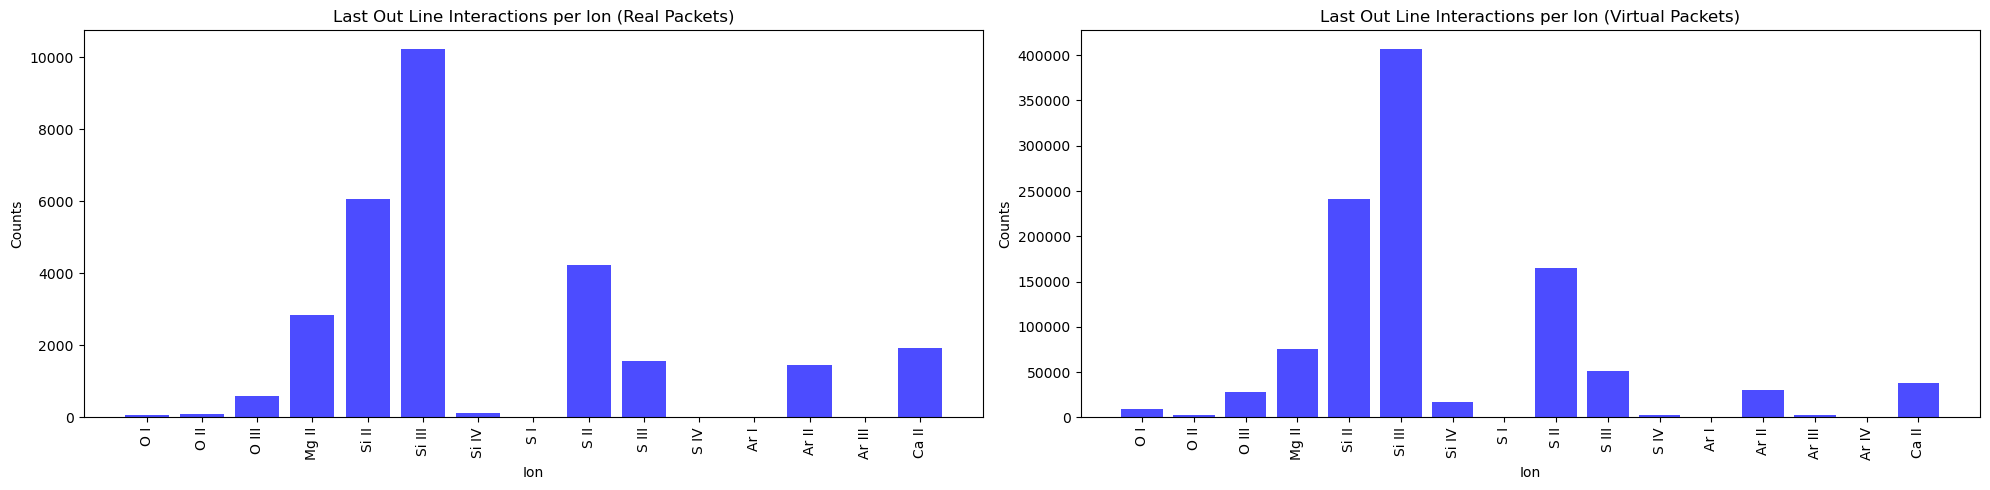

In [14]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(20, 5))

# Plotting for real packets
labels = out_line_count_by_ion.index
values = out_line_count_by_ion.values

xticks = np.arange(len(labels))
bars = axes[0].bar(xticks, values, align="center", alpha=0.7, color="b")

axes[0].set_xticks(xticks, labels, rotation="vertical")
axes[0].set_xlabel("Ion")
axes[0].set_ylabel("Counts")
axes[0].set_title("Last Out Line Interactions per Ion (Real Packets)")

# Plotting for virtual packets
labels = virt_out_line_count_by_ion.index
values = virt_out_line_count_by_ion.values

xticks = np.arange(len(labels))
bars = axes[1].bar(xticks, values, align="center", alpha=0.7, color="b")

axes[1].set_xticks(xticks, labels, rotation="vertical")
axes[1].set_xlabel("Ion")
axes[1].set_ylabel("Counts")
axes[1].set_title("Last Out Line Interactions per Ion (Virtual Packets)")

plt.tight_layout()
plt.show()

In [15]:
## Creating plots in plotly

fig = make_subplots(
    rows=1,
    cols=2,
    subplot_titles=(
        "Last Out Line Interactions per Ion (Real Packets)",
        "Last Out Line Interactions per Ion (Virtual Packets)",
    ),
)

# Trace for Real packets
fig.add_trace(
    go.Bar(
        x=out_line_count_by_ion.index,
        y=out_line_count_by_ion.values,
        name="Real Packets",
    ),
    row=1,
    col=1,
)

# Trace for Virtual packets
fig.add_trace(
    go.Bar(
        x=virt_out_line_count_by_ion.index,
        y=virt_out_line_count_by_ion.values,
        name="Virtual Packet",
    ),
    row=1,
    col=2,
)

fig.update_xaxes(title_text="Ion", row=1, col=1)
fig.update_xaxes(title_text="Ion", row=1, col=2)
fig.update_yaxes(title_text="Counts", row=1, col=1)
fig.update_yaxes(title_text="Counts", row=1, col=2)

fig.show()